**What is sentiment Analysis?**

Sentiment analysis is also known as Opinion mining or emotion AI refers to the use of NLP, text analysis, computational linguistics and biometrics to systematically identify, extracr, quantify and study effective states & subjective information. 

Automated extraction of subjective content from digital text and predicting the subjectivity as positive or negative. 

**Applications of Sentiment analysis.**


*   Understand intent behind language in an unbiased manner
*   Used in different business areas like retail, healthcare, any customer-centric organization.
*   Respond to customer complaints with better solutions. 



**Sentiment Analysis Algorithms**

Sentiment analysis algorithms are classified as:


*   **Rule-based** systems that perform sentiment analysis based on a set of manually crafted rules. 
    Usually some kind of scripting language is used to define these rules. They are used to identify subjectivity, polarity or the subject of an opinion.
    
    These rules may use a variety of inputs, for example:
      *  Classic NLP techniques : stemming, tokenization, POS tagging & parsing.
      *  Other resources like lexicons(i.e lists of words and expressions).
*   **Automatic** systems that rely on machine learning techniques to learn from Data
      * No hand-crafted rules
      * Relies on ML techniques
      * Modelled as a classification task. Which can further be categorised as follows:
          * Can be Naive Bayes classifier
          * SVM
          * DL based classifiers
*   **Hybrid** systems that combine above two approaches. 
      * Combines the best of both worlds - rule-based and Automatic approach
      * Can improce Accuracy and Precision


**Basic Workflow of Sentiment Analysis**

1. <font color="green"> Gather unstructured data</font>  - Readymade Data set is used
2. <font color="green"> Data Cleaning and Preprocessing</font> - only Preprocessing will be done
3. <font color="green"> Vectorizing Data</font> - Embedding layer of Keras will be used
4. <font color="green">Algorithm Selection (Depending on accuracy and Performance trade-off)</font> - LSTM will be used for capturing sequence
5. <font color="green">Training and cross-validation</font> - Done here
6. <font color="green">Prediction</font> - Trained model is used for prediction

### **Data Set details**

**IMDB movie Review Dataset**
Raw IMDB data is structured as 50,000 individual text files where the sentiment
(negative = 0, positive = 1) is part of each file name.

However, the Keras library has a built-in sub-module named datasets that can import the IMDB training and test datasets.


**Approach used here:**

1. Load data into memory : keras.datasets.imdb.load_data()
2. Define the model : keras. models.Sequential().add(...)
3. Compile the model : model.compile()
4. Train model : model.fit()
5. Evaluate model : model.evaluate()
6. Save model : model.save()
7. Use model to make a prediction : model.predict()

Indexes from the above reviews represent ranks. First 3 indexes are reserved (Hence **idx-3** is done below)
*  0 -> Padding
*  1 -> Start of sequence
*  2 -> oov_char= out of vocabulary(words whose rank is greater than the max_length) default is 2
*  3 -> Most frequent word by default. 



### **Our Model**
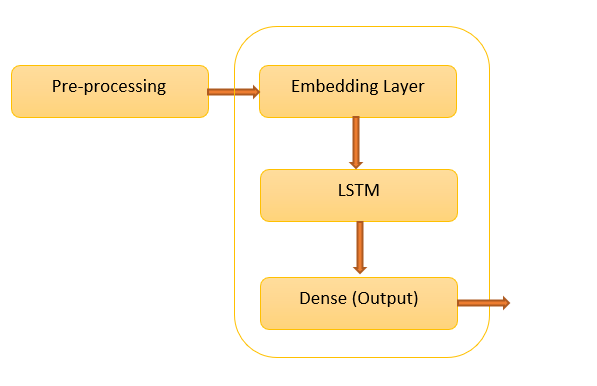

## **Define the Model**

### Sentiment Analysis in Keras

In [1]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

In [2]:
max_words=20000
print("Loading Data . . . ")
(x_train,y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')


Loading Data . . . 
25000 train sequences
25000 test sequences


### Preprocessing


In [3]:
# cut texts after this number of words (among top max_features most common words)
max_review_length = 80
x_train = sequence.pad_sequences(x_train, truncating='pre', padding='pre', maxlen=max_review_length)
max_review_length = 80
x_test = sequence.pad_sequences(x_test, truncating='pre', padding='pre', maxlen=max_review_length)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


#### Build The model

In [12]:
print('Build model...')
embedding_length = 64
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_length, input_length=max_review_length))
model.add(LSTM(units=64, input_shape=(max_review_length, embedding_length), return_sequences=True, unroll=True))
model.add(LSTM(units=32, input_shape=(max_review_length, embedding_length), return_sequences=False , unroll=True)) 
model.add(Dense(1, activation='sigmoid'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...


#### Visualise the model


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 80, 64)            1280000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 80, 64)            33024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,325,473
Trainable params: 1,325,473
Non-trainable params: 0
_________________________________________________________________


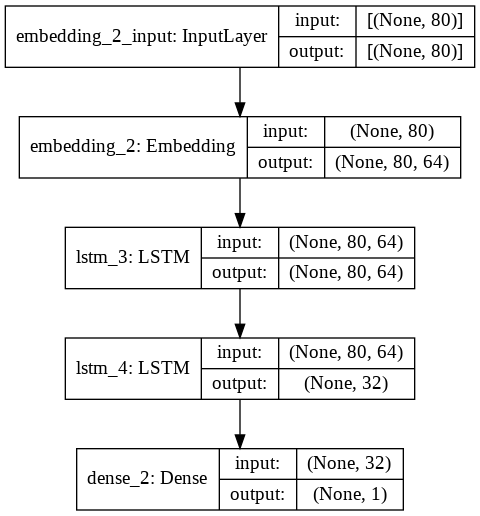

In [13]:

model.summary()
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

#### Train the model

In [14]:
print('Training...')
batch_size = 32
model.fit(x_train, y_train,
    batch_size = batch_size,
    epochs=10,
    validation_data = (x_test, y_test))

Training...
Epoch 1/10
782/782 [==============================] - 92s 85ms/step - loss: 0.4201 - accuracy: 0.7995 - val_loss: 0.3631 - val_accuracy: 0.8402
Epoch 2/10
782/782 [==============================] - 65s 83ms/step - loss: 0.2445 - accuracy: 0.9048 - val_loss: 0.3756 - val_accuracy: 0.8313
Epoch 3/10
782/782 [==============================] - 64s 82ms/step - loss: 0.1516 - accuracy: 0.9435 - val_loss: 0.4617 - val_accuracy: 0.8122
Epoch 4/10
782/782 [==============================] - 64s 82ms/step - loss: 0.0902 - accuracy: 0.9690 - val_loss: 0.6565 - val_accuracy: 0.8192
Epoch 5/10
782/782 [==============================] - 64s 82ms/step - loss: 0.0605 - accuracy: 0.9800 - val_loss: 0.6923 - val_accuracy: 0.8111
Epoch 6/10
782/782 [==============================] - 65s 83ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.7097 - val_accuracy: 0.8175
Epoch 7/10
782/782 [==============================] - 64s 82ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.7572 - v

#### Evaluate the model

In [15]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test score = {score}')
print(f'Test accuracy = {acc}')

782/782 [==============================] - 14s 18ms/step - loss: 0.9231 - accuracy: 0.8160
Test score = 0.9231351017951965
Test accuracy = 0.8159999847412109


#### Making Predictions with the model

In [19]:
def Print_rev(prediction):
  if (prediction > 0.6):
    print("Review is positive")
  elif (prediction < 0.4):
    print("Review is negative")
  else:
    print("Review is neutral")

The below function will predict the strength of positivity or negativity or neutralness of the review submitted by the user. 

In [24]:
def getPrediction(review):
  review = review.lower()   # This changes all the characters to lower case
  print(f'New review = {review}')

  d = imdb.get_word_index()
  words = review.split()
  review = []

  for word in words:
    if word not in d:
      review.append(2)
    else:
      review.append(d[word] + 3)

  # print(f"review = {review}")
  review = sequence.pad_sequences([review], truncating='pre', padding='pre', maxlen=80)
  return(model.predict(review))

In [25]:
review = "The movie was a great waste of time"

prediction=getPrediction(review)
Print_rev(prediction)
# print(f'Prediction (0 = Negative, 1 = positive) = {prediction}')

New review = the movie was a great waste of time
Review is negative


In [26]:
review = "I enjoyed the movie a lot"

prediction=getPrediction(review)
Print_rev(prediction)

New review = i enjoyed the movie a lot
Review is positive


In [28]:
review = "I wouldn't mind watching it again if the movie was a little short"

prediction=getPrediction(review)
Print_rev(prediction)

New review = i wouldn't mind watching it again if the movie was a little short
Review is positive
